# Livrarias Python necessárias para a execução do projeto.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

# **Introdução**

&nbsp;

Utilizaremos um conjunto de dados de consumo de combustível que contém classificações de consumo de combustível específicas do modelo e emissões estimadas de dióxido de carbono para veículos leves a venda no Canadá. 

&nbsp;

Download, documentação e licensa de uso para a base da dados podem ser acessados em: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

&nbsp;

# **Variáveis**

&nbsp;

A seguir, uma listagem e breve descrição das varáveis.

&nbsp;

**ANO_MODELO** - Ano de fabricação do modelo

**FABRICANTE** - Empresa fabricante do veículo

**MODELO** - Modelo do veículo

**CLASSE** - Classe de veículo

**TAM_MOTOR** - Tamanho (capacidade) do motor usado em litros

**NUM_CILIN** - Número de cilindros

**TRANSMISSAO** - Tipo de transmissão com número de marchas

**TIPO_COMBUS** - Tipo de combustivel usado

**CONS_COMB_CID** - Consumo de combustível na cidade (L/100 km)

**CONS_COMB_AVE** - Consumo de combustível em rodovias (L/100 km)

**CONS_COMB_COMB** - O consumo de combustível combinado (cidade e rodovia) (L/100 km)

**EMISSAO_CO2** - Emissão de CO2 (g/km)

In [ ]:
url_dados = 'https://github.com/MagnerSA/estatistica-aplicada/blob/main/consumo.csv'
df = pd.read_csv(url_dados)
df.head()

,ANOMODELO,FABRICANTE,MODELO,CLASSE,TAM_MOTOR,NUM_CILIN,TRANSMISSAO,TIPO_COMBUS,CONS_COMB_CID,CONS_COMB_AVE,CONS_COMB_COMB,CONS_COMB_COMB_MPG,EMISSAO_CO2
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Vamos selecionar recursos que queremos usar para regressão.

In [ ]:
variaveis = df[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_CID', 'CONS_COMB_AVE', 'CONS_COMB_COMB', 'EMISSAO_CO2']]
variaveis.head()

,TAM_MOTOR,NUM_CILIN,CONS_COMB_CID,CONS_COMB_AVE,CONS_COMB_COMB,EMISSAO_CO2
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


Vamos representar graficamente os valores de emissão em relação ao tamanho do motor:

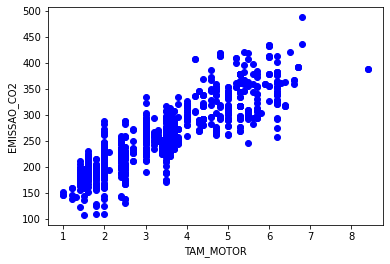

In [ ]:
plt.scatter(variaveis.TAM_MOTOR, variaveis.EMISSAO_CO2, color='blue')
plt.xlabel('TAM_MOTOR')
plt.ylabel('EMISSAO_CO2')
plt.show()

# **Criação de conjunto de dados de treinamento e teste**

&nbsp;

A divisão de treinamento/teste envolve a divisão do conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste. Isso fornecerá uma avaliação mais precisa sobre a precisão fora da amostra porque o conjunto de dados de teste não faz parte do conjunto de dados que foi usado para treinar os dados. É mais realista para problemas do mundo real. Isso significa que sabemos o resultado de cada ponto de dados neste conjunto de dados, tornando-o ótimo para testar! E uma vez que esses dados não foram usados ​​para treinar o modelo, o modelo não tem conhecimento do resultado desses pontos de dados. Então, em essência, é realmente um teste fora da amostra.

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = variaveis[msk]
test = variaveis[~msk]

# **Distribuição de dados de treino**

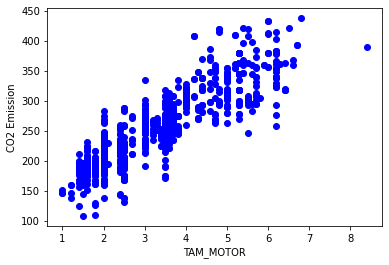

In [ ]:
plt.scatter(train.TAM_MOTOR, train.EMISSAO_CO2, color = 'blue')
plt.xlabel('TAM_MOTOR')
plt.ylabel('CO2 Emission')
plt.show()

# **Modelo de regressão múltipla**

&nbsp;

Na realidade, existem múltiplas variáveis ​​que predizem a emissão de CO2. A seguir utilizaremos as varáveis CONS_COMB_COMB, TAM_MOTOR e NUM_CILIN na regressão linear múltipla afim de prever a emissão de co2.

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_COMB']])
y = np.asanyarray(train[['EMISSAO_CO2']])
regr.fit(x,y)

print('Coeficientes: ', regr.coef_)

Coeficientes:  [[10.04716757  7.91612066  9.52623644]]


# **Mínimos Quadrados Ordinários (MQO)**

&nbsp;

MQO é um método para estimar os parâmetros desconhecidos em um modelo de regressão linear. MQO escolhe os parâmetros de uma função linear de um conjunto de variáveis ​​explicativas, minimizando a soma dos quadrados das diferenças entre a variável dependente alvo e aqueles previstos pela função linear, ou seja, ele tenta minimizar a soma dos erros quadráticos ou erro quadrático médio entre a variável de destino e nossa saída prevista em todas as amostras no conjunto de dados.

# **Predição**

In [ ]:
y_= regr.predict(test[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_COMB']])
x = np.asanyarray(test[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_COMB']])
y = np.asanyarray(test[['EMISSAO_CO2']])
print('Quadrados de soma residual: %.2f' % np.mean((y_ - y) ** 2))
print('Pontuação de variância: %.2f' % regr.score(x, y)) 

Quadrados de soma residual: 539.43
Pontuação de variância: 0.89


# **pontuação de regressão de variância explicada:**

&nbsp;

Se $\hat{y}$ é o produto alvo estimado, y é o produto alvo correspondente (correto) e Var é a variância, o quadrado do desvio padrão, então a variância explicada é estimada da seguinte forma:

&nbsp;

$\texttt{variância}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  

&nbsp;

A melhor pontuação possível é 1,0.

Nós também podemos usar um modelo utilizando os atributos CONS_COMB_CID e CONS_COMB_AVE ao invés de usarmos CONS_COMB_COMB, para fins comparativos, como segue abaixo:


In [ ]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_CID', 'CONS_COMB_AVE']])
y = np.asanyarray(train[['EMISSAO_CO2']])
regr.fit (x, y)
print ('Coeficientes: ', regr.coef_)

y_= regr.predict(test[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_CID', 'CONS_COMB_AVE']])
x = np.asanyarray(test[['TAM_MOTOR', 'NUM_CILIN', 'CONS_COMB_CID', 'CONS_COMB_AVE']])
y = np.asanyarray(test[['EMISSAO_CO2']])

print("Quadrados de soma residual: %.2f"% np.mean((y_ - y) ** 2))
print('Pontuação de variância: %.2f' % regr.score(x, y))

Coeficientes:  [[10.10719828  7.64456063  5.88471282  3.44678079]]
Quadrados de soma residual: 538.80
Pontuação de variância: 0.89


É possível perceber que há uma diferença minima entre resultados do modelo utilizando as variáveis TAM_MOTOR, NUM_CILIN,CONS_COMB_COMB e do modelo utilizando as variáveis TAM_MOTOR, NUM_CILIN, CONS_COMB_CID, CONS_COMB_AVE.